# Final Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'

In [4]:
kz_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/data_clean/kz_data_en_clean.csv')
foreign_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/data_clean/student_portuguese_clean.csv')
all_models = pd.read_csv('/Users/kassi/Data Mining/Final/Code/report/ensemble/all_models_comparison.csv')

In [5]:
try:
    kz_rf_importance = pd.read_csv('/Users/kassi/Data Mining/Final/Code/report/ensemble/kz_rf_feature_importance.csv')
    foreign_rf_importance = pd.read_csv('/Users/kassi/Data Mining/Final/Code/report/ensemble/foreign_rf_feature_importance.csv')
except:
    print("Feature importance files not found")

print("Data loaded successfully!")


Data loaded successfully!


# Publication Figure 1: Dataset Overview

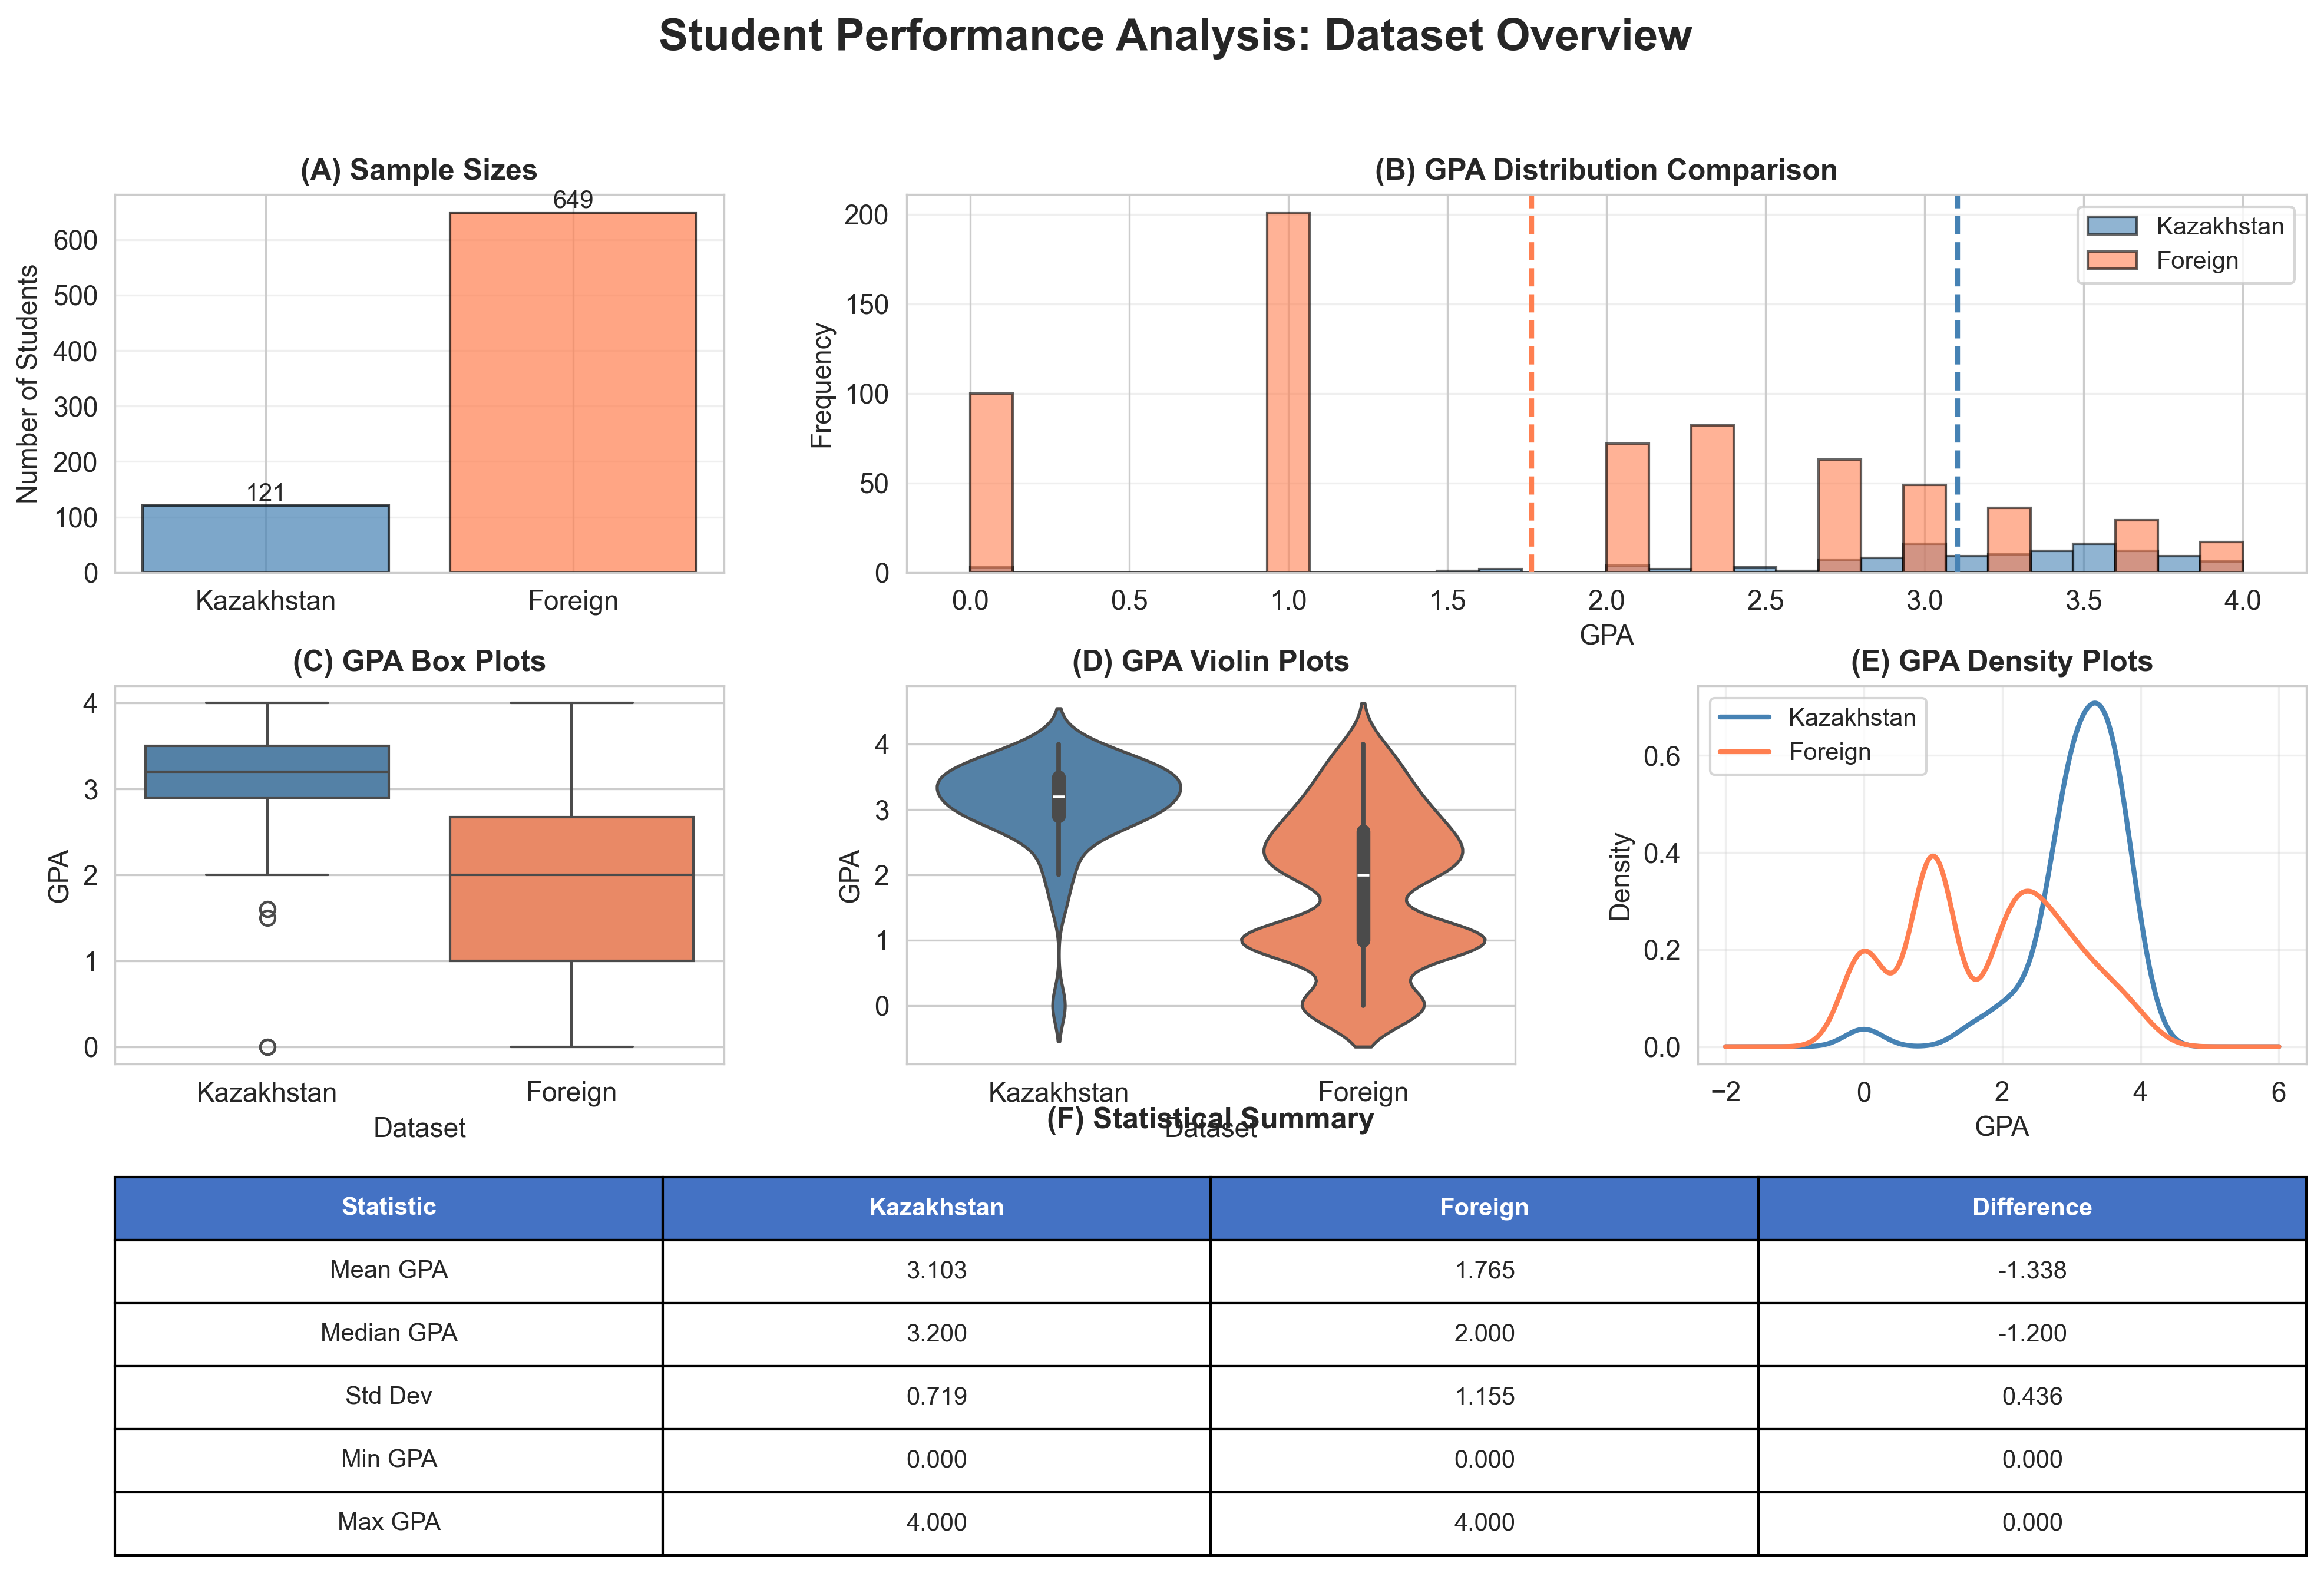

✓ Figure 1 created and saved!


In [7]:
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('Student Performance Analysis: Dataset Overview', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Sample sizes
ax1 = fig.add_subplot(gs[0, 0])
datasets = ['Kazakhstan', 'Foreign']
sizes = [len(kz_data), len(foreign_data)]
colors = ['steelblue', 'coral']
bars = ax1.bar(datasets, sizes, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Number of Students', fontsize=11)
ax1.set_title('(A) Sample Sizes', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=10)

# 2. GPA distributions
ax2 = fig.add_subplot(gs[0, 1:])
ax2.hist(kz_data['gpa'], bins=30, alpha=0.6, label='Kazakhstan', 
         color='steelblue', edgecolor='black')
ax2.hist(foreign_data['final_grade'], bins=30, alpha=0.6, label='Foreign', 
         color='coral', edgecolor='black')
ax2.axvline(kz_data['gpa'].mean(), color='steelblue', linestyle='--', linewidth=2)
ax2.axvline(foreign_data['final_grade'].mean(), color='coral', linestyle='--', linewidth=2)
ax2.set_xlabel('GPA', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('(B) GPA Distribution Comparison', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# 3. Box plots
ax3 = fig.add_subplot(gs[1, 0])
data_box = pd.DataFrame({
    'GPA': list(kz_data['gpa']) + list(foreign_data['final_grade']),
    'Dataset': ['Kazakhstan']*len(kz_data) + ['Foreign']*len(foreign_data)
})
sns.boxplot(data=data_box, x='Dataset', y='GPA', ax=ax3, palette=['steelblue', 'coral'])
ax3.set_title('(C) GPA Box Plots', fontsize=12, fontweight='bold')
ax3.set_ylabel('GPA', fontsize=11)
ax3.set_xlabel('Dataset', fontsize=11)

# 4. Violin plots
ax4 = fig.add_subplot(gs[1, 1])
sns.violinplot(data=data_box, x='Dataset', y='GPA', ax=ax4, palette=['steelblue', 'coral'])
ax4.set_title('(D) GPA Violin Plots', fontsize=12, fontweight='bold')
ax4.set_ylabel('GPA', fontsize=11)
ax4.set_xlabel('Dataset', fontsize=11)

# 5. Density plots
ax5 = fig.add_subplot(gs[1, 2])
kz_data['gpa'].plot(kind='density', ax=ax5, label='Kazakhstan', 
                    color='steelblue', linewidth=2)
foreign_data['final_grade'].plot(kind='density', ax=ax5, label='Foreign', 
                         color='coral', linewidth=2)
ax5.set_xlabel('GPA', fontsize=11)
ax5.set_ylabel('Density', fontsize=11)
ax5.set_title('(E) GPA Density Plots', fontsize=12, fontweight='bold')
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3)

# 6. Statistics table
ax6 = fig.add_subplot(gs[2, :])
ax6.axis('tight')
ax6.axis('off')

stats_data = [
    ['Statistic', 'Kazakhstan', 'Foreign', 'Difference'],
    ['Mean GPA', f"{kz_data['gpa'].mean():.3f}", f"{foreign_data['final_grade'].mean():.3f}", 
     f"{(foreign_data['final_grade'].mean() - kz_data['gpa'].mean()):.3f}"],
    ['Median GPA', f"{kz_data['gpa'].median():.3f}", f"{foreign_data['final_grade'].median():.3f}",
     f"{(foreign_data['final_grade'].median() - kz_data['gpa'].median()):.3f}"],
    ['Std Dev', f"{kz_data['gpa'].std():.3f}", f"{foreign_data['final_grade'].std():.3f}",
     f"{(foreign_data['final_grade'].std() - kz_data['gpa'].std()):.3f}"],
    ['Min GPA', f"{kz_data['gpa'].min():.3f}", f"{foreign_data['final_grade'].min():.3f}",
     f"{(foreign_data['final_grade'].min() - kz_data['gpa'].min()):.3f}"],
    ['Max GPA', f"{kz_data['gpa'].max():.3f}", f"{foreign_data['final_grade'].max():.3f}",
     f"{(foreign_data['final_grade'].max() - kz_data['gpa'].max()):.3f}"]
]

table = ax6.table(cellText=stats_data, cellLoc='center', loc='center',
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header row
for i in range(4):
    table[(0, i)].set_facecolor('#4472C4')
    table[(0, i)].set_text_props(weight='bold', color='white')

ax6.set_title('(F) Statistical Summary', fontsize=12, fontweight='bold', pad=20)

plt.savefig('/Users/kassi/Data Mining/Final/Code/final/visualization/publication_figure1_dataset_overview.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 1 created and saved!")

# Publication Figure 2: Model Performance

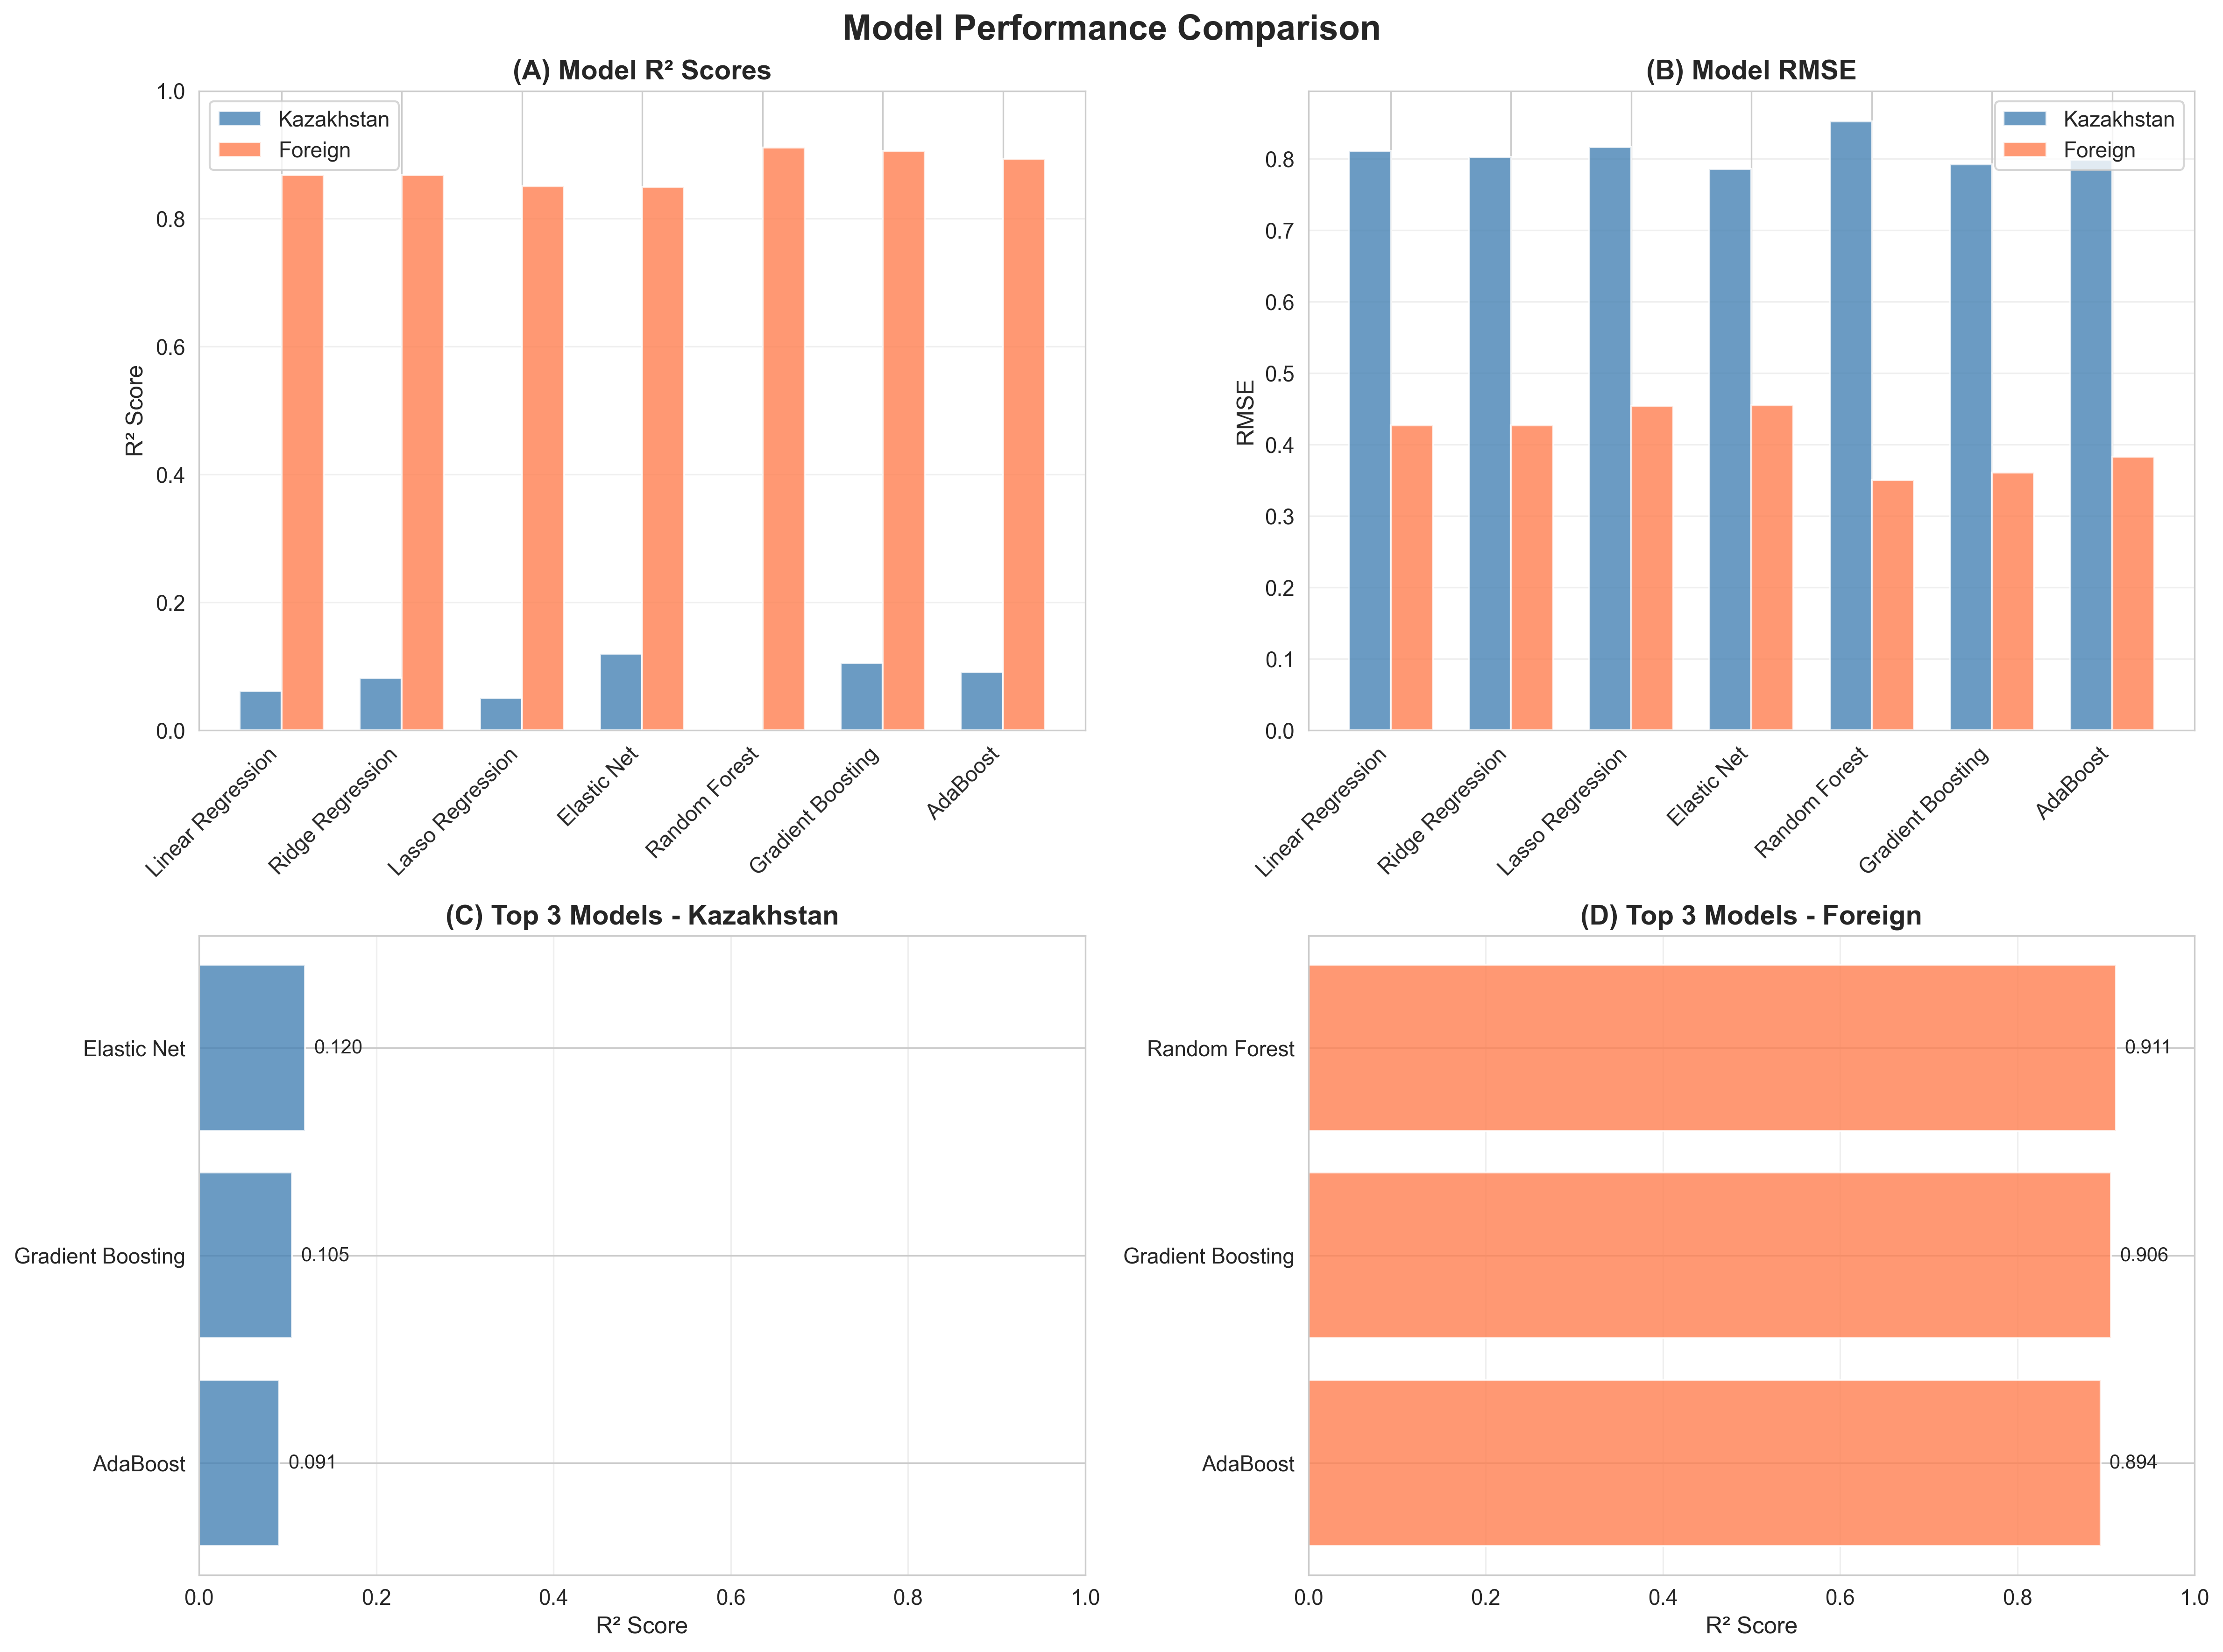

✓ Figure 2 created and saved!


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

fig.suptitle('Model Performance Comparison', fontsize=18, fontweight='bold')

# Get top models
kz_models = all_models[all_models['Dataset'] == 'Kazakhstan'].sort_values('Test_R2', ascending=False)
foreign_models = all_models[all_models['Dataset'] == 'Foreign'].sort_values('Test_R2', ascending=False)

# (A) R² Comparison
model_names = all_models['Model'].unique()
kz_r2 = [kz_models[kz_models['Model']==m]['Test_R2'].values[0] if m in kz_models['Model'].values else 0 
         for m in model_names]
foreign_r2 = [foreign_models[foreign_models['Model']==m]['Test_R2'].values[0] if m in foreign_models['Model'].values else 0 
              for m in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0, 0].bar(x - width/2, kz_r2, width, label='Kazakhstan', alpha=0.8, color='steelblue')
axes[0, 0].bar(x + width/2, foreign_r2, width, label='Foreign', alpha=0.8, color='coral')
axes[0, 0].set_ylabel('R² Score', fontsize=12)
axes[0, 0].set_title('(A) Model R² Scores', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(axis='y', alpha=0.3)

# (B) RMSE Comparison
kz_rmse = [kz_models[kz_models['Model']==m]['Test_RMSE'].values[0] if m in kz_models['Model'].values else 0 
           for m in model_names]
foreign_rmse = [foreign_models[foreign_models['Model']==m]['Test_RMSE'].values[0] if m in foreign_models['Model'].values else 0 
                for m in model_names]

axes[0, 1].bar(x - width/2, kz_rmse, width, label='Kazakhstan', alpha=0.8, color='steelblue')
axes[0, 1].bar(x + width/2, foreign_rmse, width, label='Foreign', alpha=0.8, color='coral')
axes[0, 1].set_ylabel('RMSE', fontsize=12)
axes[0, 1].set_title('(B) Model RMSE', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# (C) Top 3 Models - Kazakhstan
top3_kz = kz_models.head(3)
axes[1, 0].barh(top3_kz['Model'], top3_kz['Test_R2'], alpha=0.8, color='steelblue')
axes[1, 0].set_xlabel('R² Score', fontsize=12)
axes[1, 0].set_title('(C) Top 3 Models - Kazakhstan', fontsize=14, fontweight='bold')
axes[1, 0].set_xlim([0, 1])
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(top3_kz.iterrows()):
    axes[1, 0].text(row['Test_R2'] + 0.01, i, f"{row['Test_R2']:.3f}", 
                   va='center', fontsize=10)

# (D) Top 3 Models - Foreign
top3_foreign = foreign_models.head(3)
axes[1, 1].barh(top3_foreign['Model'], top3_foreign['Test_R2'], alpha=0.8, color='coral')
axes[1, 1].set_xlabel('R² Score', fontsize=12)
axes[1, 1].set_title('(D) Top 3 Models - Foreign', fontsize=14, fontweight='bold')
axes[1, 1].set_xlim([0, 1])
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(top3_foreign.iterrows()):
    axes[1, 1].text(row['Test_R2'] + 0.01, i, f"{row['Test_R2']:.3f}", 
                   va='center', fontsize=10)

plt.tight_layout()
plt.savefig('/Users/kassi/Data Mining/Final/Code/final/visualization/publication_figure2_model_performance.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 2 created and saved!")

# Publication Figure 3: Feature Importance

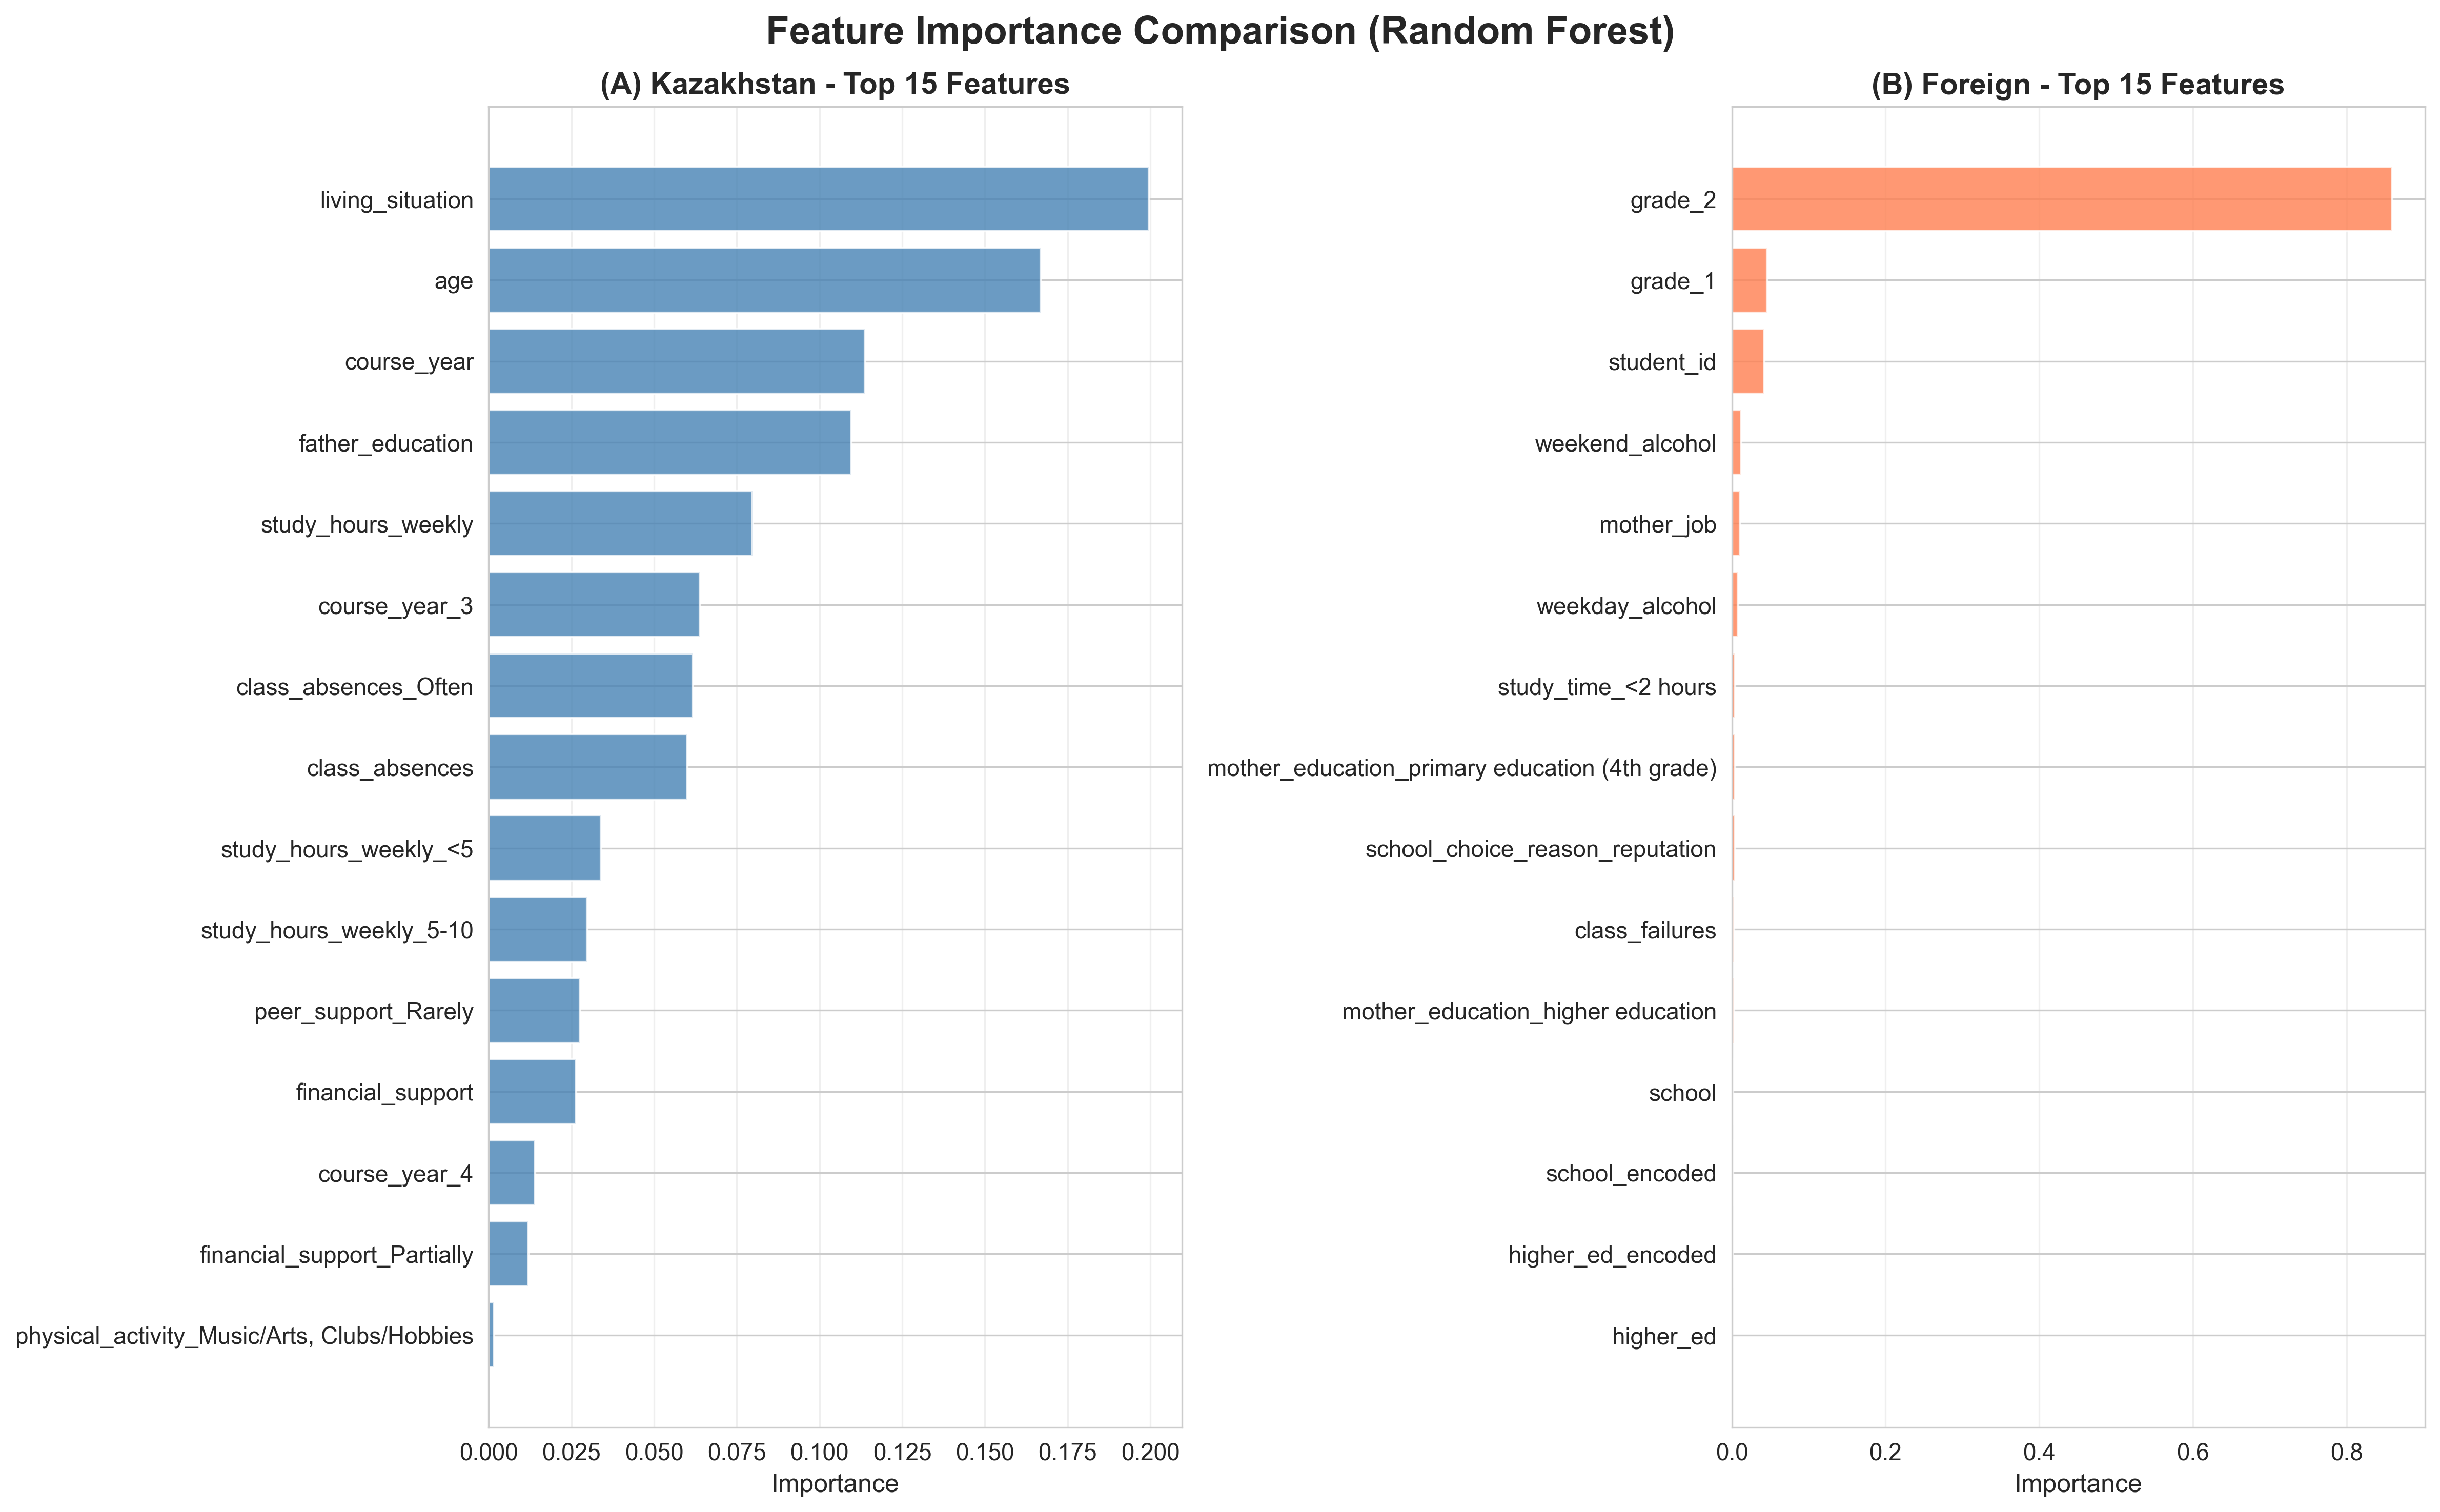

✓ Figure 3 created and saved!


In [10]:
if 'kz_rf_importance' in dir() and 'foreign_rf_importance' in dir():
    fig, axes = plt.subplots(1, 2, figsize=(16, 10))
    
    fig.suptitle('Feature Importance Comparison (Random Forest)', 
                 fontsize=18, fontweight='bold')
    
    # Kazakhstan
    top_kz = kz_rf_importance.head(15)
    axes[0].barh(top_kz['Feature'], top_kz['Importance'], alpha=0.8, color='steelblue')
    axes[0].set_xlabel('Importance', fontsize=12)
    axes[0].set_title('(A) Kazakhstan - Top 15 Features', fontsize=14, fontweight='bold')
    axes[0].invert_yaxis()
    axes[0].grid(axis='x', alpha=0.3)
    
    # Foreign
    top_foreign = foreign_rf_importance.head(15)
    axes[1].barh(top_foreign['Feature'], top_foreign['Importance'], alpha=0.8, color='coral')
    axes[1].set_xlabel('Importance', fontsize=12)
    axes[1].set_title('(B) Foreign - Top 15 Features', fontsize=14, fontweight='bold')
    axes[1].invert_yaxis()
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('/Users/kassi/Data Mining/Final/Code/final/visualization/publication_figure3_feature_importance.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Figure 3 created and saved!")

# Interactive Dashboard with Plotly

In [11]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('R² Score Comparison', 'RMSE Comparison',
                    'Kazakhstan Top Models', 'Foreign Top Models'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]]
)

# R² comparison
for dataset, color in [('Kazakhstan', 'steelblue'), ('Foreign', 'coral')]:
    dataset_models = all_models[all_models['Dataset'] == dataset]
    fig.add_trace(
        go.Bar(name=dataset, x=dataset_models['Model'], y=dataset_models['Test_R2'],
               marker_color=color),
        row=1, col=1
    )

# RMSE comparison
for dataset, color in [('Kazakhstan', 'steelblue'), ('Foreign', 'coral')]:
    dataset_models = all_models[all_models['Dataset'] == dataset]
    fig.add_trace(
        go.Bar(name=dataset, x=dataset_models['Model'], y=dataset_models['Test_RMSE'],
               marker_color=color, showlegend=False),
        row=1, col=2
    )

# Top Kazakhstan models
kz_top = kz_models.head(5)
fig.add_trace(
    go.Bar(x=kz_top['Test_R2'], y=kz_top['Model'], orientation='h',
           marker_color='steelblue', showlegend=False,
           text=kz_top['Test_R2'].round(3), textposition='outside'),
    row=2, col=1
)

# Top Foreign models
foreign_top = foreign_models.head(5)
fig.add_trace(
    go.Bar(x=foreign_top['Test_R2'], y=foreign_top['Model'], orientation='h',
           marker_color='coral', showlegend=False,
           text=foreign_top['Test_R2'].round(3), textposition='outside'),
    row=2, col=2
)

fig.update_xaxes(title_text="R² Score", row=1, col=1)
fig.update_xaxes(title_text="RMSE", row=1, col=2)
fig.update_xaxes(title_text="R² Score", row=2, col=1)
fig.update_xaxes(title_text="R² Score", row=2, col=2)

fig.update_layout(height=800, showlegend=True, title_text="Interactive Model Performance Dashboard",
                 title_font_size=20)

fig.write_html('/Users/kassi/Data Mining/Final/Code/final/visualization/interactive_model_dashboard.html')
print("✓ Interactive dashboard created and saved!")

✓ Interactive dashboard created and saved!


# Interactive Feature Importance

In [12]:
if 'kz_rf_importance' in dir() and 'foreign_rf_importance' in dir():
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Kazakhstan Feature Importance', 'Foreign Feature Importance')
    )
    
    # Kazakhstan
    kz_top = kz_rf_importance.head(15)
    fig.add_trace(
        go.Bar(x=kz_top['Importance'], y=kz_top['Feature'], orientation='h',
               marker_color='steelblue', name='Kazakhstan',
               text=kz_top['Importance'].round(4), textposition='outside'),
        row=1, col=1
    )
    
    # Foreign
    foreign_top = foreign_rf_importance.head(15)
    fig.add_trace(
        go.Bar(x=foreign_top['Importance'], y=foreign_top['Feature'], orientation='h',
               marker_color='coral', name='Foreign',
               text=foreign_top['Importance'].round(4), textposition='outside'),
        row=1, col=2
    )
    
    fig.update_xaxes(title_text="Importance", row=1, col=1)
    fig.update_xaxes(title_text="Importance", row=1, col=2)
    
    fig.update_layout(height=700, showlegend=False, 
                     title_text="Feature Importance Comparison",
                     title_font_size=20)
    
    fig.write_html('/Users/kassi/Data Mining/Final/Code/final/visualization/interactive_feature_importance.html')
    print("✓ Interactive feature importance created and saved!")

✓ Interactive feature importance created and saved!


# Summary Infographic

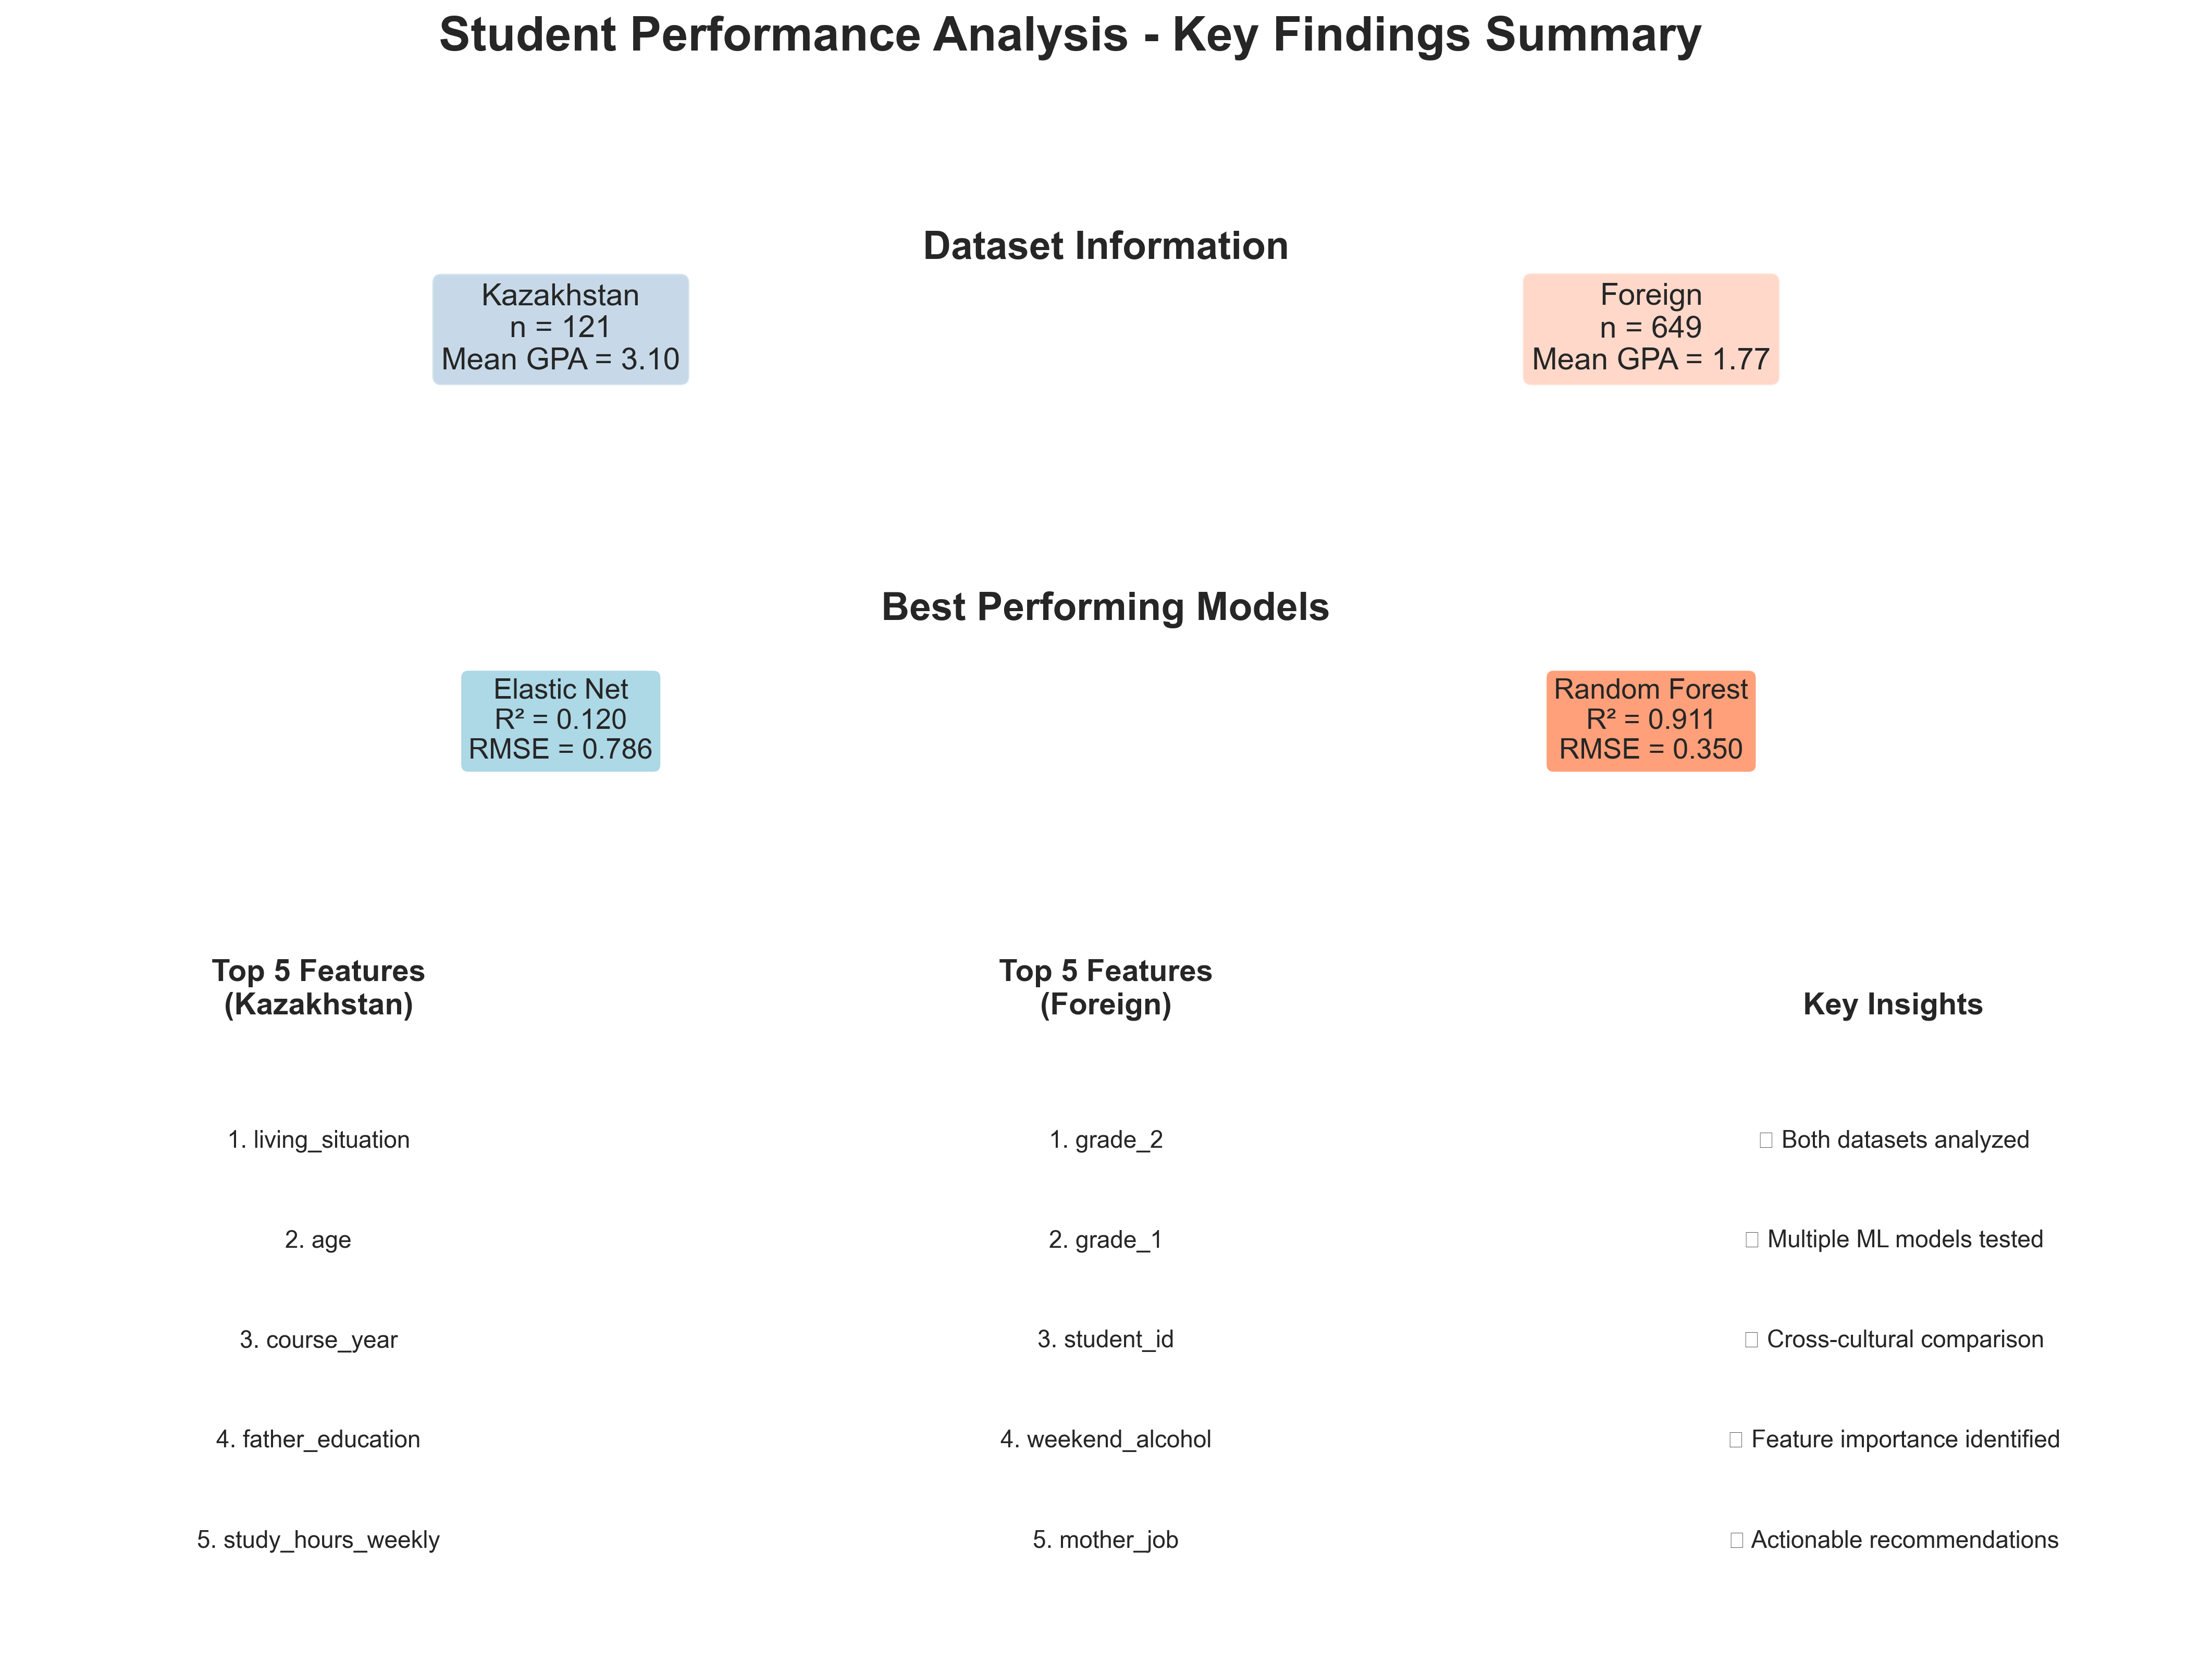

✓ Summary infographic created and saved!

VISUALIZATION SUMMARY

Publication-Quality Figures Created:
1. ✓ Dataset Overview (publication_figure1_dataset_overview.png)
2. ✓ Model Performance (publication_figure2_model_performance.png)
3. ✓ Feature Importance (publication_figure3_feature_importance.png)
4. ✓ Interactive Dashboard (interactive_model_dashboard.html)
5. ✓ Interactive Feature Importance (interactive_feature_importance.html)
6. ✓ Summary Infographic (summary_infographic.png)

All figures saved to: ../results/figures/


In [14]:
fig = plt.figure(figsize=(18, 12))
fig.suptitle('Student Performance Analysis - Key Findings Summary', 
             fontsize=22, fontweight='bold', y=0.98)

gs = fig.add_gridspec(4, 3, hspace=0.4, wspace=0.3)

# 1. Dataset info
ax1 = fig.add_subplot(gs[0, :])
ax1.axis('off')
ax1.text(0.5, 0.8, 'Dataset Information', ha='center', fontsize=18, fontweight='bold')
ax1.text(0.25, 0.4, f'Kazakhstan\nn = {len(kz_data)}\nMean GPA = {kz_data["gpa"].mean():.2f}', 
         ha='center', fontsize=14, bbox=dict(boxstyle='round', facecolor='steelblue', alpha=0.3))
ax1.text(0.75, 0.4, f'Foreign\nn = {len(foreign_data)}\nMean GPA = {foreign_data["final_grade"].mean():.2f}', 
         ha='center', fontsize=14, bbox=dict(boxstyle='round', facecolor='coral', alpha=0.3))

# 2. Best Models
ax2 = fig.add_subplot(gs[1, :])
ax2.axis('off')
ax2.text(0.5, 0.9, 'Best Performing Models', ha='center', fontsize=18, fontweight='bold')
kz_best = kz_models.iloc[0]
foreign_best = foreign_models.iloc[0]
ax2.text(0.25, 0.4, f"{kz_best['Model']}\nR² = {kz_best['Test_R2']:.3f}\nRMSE = {kz_best['Test_RMSE']:.3f}", 
         ha='center', fontsize=13, bbox=dict(boxstyle='round', facecolor='lightblue'))
ax2.text(0.75, 0.4, f"{foreign_best['Model']}\nR² = {foreign_best['Test_R2']:.3f}\nRMSE = {foreign_best['Test_RMSE']:.3f}", 
         ha='center', fontsize=13, bbox=dict(boxstyle='round', facecolor='lightsalmon'))

# 3. Top Features
ax3 = fig.add_subplot(gs[2:, 0])
ax3.axis('off')
ax3.text(0.5, 0.95, 'Top 5 Features\n(Kazakhstan)', ha='center', fontsize=14, fontweight='bold')
if 'kz_rf_importance' in dir():
    y_pos = 0.75
    for i, row in kz_rf_importance.head(5).iterrows():
        ax3.text(0.5, y_pos, f"{i+1}. {row['Feature']}", ha='center', fontsize=11)
        y_pos -= 0.15

ax4 = fig.add_subplot(gs[2:, 1])
ax4.axis('off')
ax4.text(0.5, 0.95, 'Top 5 Features\n(Foreign)', ha='center', fontsize=14, fontweight='bold')
if 'foreign_rf_importance' in dir():
    y_pos = 0.75
    for i, row in foreign_rf_importance.head(5).iterrows():
        ax4.text(0.5, y_pos, f"{i+1}. {row['Feature']}", ha='center', fontsize=11)
        y_pos -= 0.15

# 4. Key Insights
ax5 = fig.add_subplot(gs[2:, 2])
ax5.axis('off')
ax5.text(0.5, 0.95, 'Key Insights', ha='center', fontsize=14, fontweight='bold')
insights_text = [
    "✓ Both datasets analyzed",
    "✓ Multiple ML models tested",
    "✓ Cross-cultural comparison",
    "✓ Feature importance identified",
    "✓ Actionable recommendations"
]
y_pos = 0.75
for insight in insights_text:
    ax5.text(0.5, y_pos, insight, ha='center', fontsize=11)
    y_pos -= 0.15

plt.savefig('../results/figures/summary_infographic.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Summary infographic created and saved!")

# %% [markdown]
# ## 7. Save All Figures Summary

# %%
print("\n" + "="*60)
print("VISUALIZATION SUMMARY")
print("="*60)
print("\nPublication-Quality Figures Created:")
print("1. ✓ Dataset Overview (publication_figure1_dataset_overview.png)")
print("2. ✓ Model Performance (publication_figure2_model_performance.png)")
print("3. ✓ Feature Importance (publication_figure3_feature_importance.png)")
print("4. ✓ Interactive Dashboard (interactive_model_dashboard.html)")
print("5. ✓ Interactive Feature Importance (interactive_feature_importance.html)")
print("6. ✓ Summary Infographic (summary_infographic.png)")
print("\nAll figures saved to: ../results/figures/")
print("="*60)